In [1]:
!pip install -U konlpy
!apt install -y fonts-nanum
!fc-cache -vf
!rm -rf ~/.cache/matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var

In [1]:
import pandas as pd

from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

In [2]:
korean_stopwords_path = "./korean_stopwords.txt"
with open(korean_stopwords_path, encoding="utf-8") as f:
    ko_stop_words = f.readlines()

ko_stop_words = [x.strip() for x in ko_stop_words]
okt = Okt()

reg_token = RegexpTokenizer("[\\w]+")
lemmatizer = WordNetLemmatizer()

FileNotFoundError: [Errno 2] No such file or directory: './korean_stopwords.txt'

In [142]:
fname = "auto_sleep_kr_result.csv"
# fname = "forest_kr_result.csv"
# fname = "sleep_town_kr_result.csv"
with open(fname, "r") as f:
    reviews = [x.strip() for x in f.readlines() if x.strip()]
    print(len(reviews))

docs = []
for review in reviews[:1000]:
    text = okt.normalize(review)
    morphs = okt.morphs(text)

    doc = []
    for word in morphs:
        if len(word) > 1 and word not in ko_stop_words:
            doc.append(word)
    docs.append(doc)

820


In [143]:
from functools import reduce
from operator import add
import re

if fname.startswith("auto"):
    nn = 20
elif fname.startswith("forest"):
    nn = 40
else:
    nn = 20

def filt(k, v):
    return re.match("^[가-힣]+(?<![요다데게에은는고서도지])$", k) and v >= nn

counts = [Counter(d) for d in docs]
total_counts = reduce(add, counts)
vocabs = sorted([k for k, v in total_counts.items() if filt(k, v)])
tf = pd.DataFrame(counts, columns=vocabs).fillna(0)
tf

,결제,계속,구매,그냥,기능,기록,너무,다시,데이터,문제,...,착용,처음,체크,추천,측정,패턴,하면,해결,확인,환불
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
len(vocabs), vocabs

(46,
 ['결제',
  '계속',
  '구매',
  '그냥',
  '기능',
  '기록',
  '너무',
  '다시',
  '데이터',
  '문제',
  '방법',
  '분석',
  '사용',
  '생각',
  '설명',
  '설정',
  '수면',
  '수면시간',
  '시작',
  '아이폰',
  '알람',
  '애플',
  '어플',
  '업데이트',
  '에러',
  '연결',
  '연동',
  '오류',
  '워치',
  '유료',
  '인식',
  '자꾸',
  '자동',
  '정말',
  '제대로',
  '진짜',
  '착용',
  '처음',
  '체크',
  '추천',
  '측정',
  '패턴',
  '하면',
  '해결',
  '확인',
  '환불'])

In [145]:
corr = tf.corr()
corr

,결제,계속,구매,그냥,기능,기록,너무,다시,데이터,문제,...,착용,처음,체크,추천,측정,패턴,하면,해결,확인,환불
결제,1.000000,-0.000952,-0.034238,0.023997,0.032631,0.033225,-0.041937,0.063224,-0.003324,-0.001547,...,0.031457,0.063846,-0.015266,-0.025901,0.000742,-0.026239,0.082164,0.118011,0.031457,0.156882
계속,-0.000952,1.000000,-0.001215,0.041662,-0.035358,-0.022988,0.005797,0.103266,-0.022095,0.061165,...,0.053264,0.030461,-0.054370,-0.038598,0.007578,-0.039102,0.007584,0.050273,0.005373,0.191486
구매,-0.034238,-0.001215,1.000000,-0.016531,0.031908,0.031663,0.062915,-0.003673,-0.035853,-0.034349,...,0.040137,0.015193,-0.046551,-0.002938,-0.033539,0.050667,0.015288,-0.001234,-0.010890,0.055280
그냥,0.023997,0.041662,-0.016531,1.000000,0.087483,0.036060,0.086638,-0.025497,-0.032916,-0.002771,...,0.034583,0.035930,0.077527,0.049915,0.067509,-0.002701,0.032600,-0.002632,0.034583,0.047074
기능,0.032631,-0.035358,0.031908,0.087483,1.000000,-0.009727,0.103810,-0.029183,-0.037675,0.011375,...,0.017861,-0.039744,0.030473,0.097719,0.052191,0.034221,0.141346,0.019725,-0.038253,-0.072413
기록,0.033225,-0.022988,0.031663,0.036060,-0.009727,1.000000,0.030742,0.053257,0.032236,0.035950,...,-0.014191,-0.014744,-0.002990,0.013808,-0.058436,-0.041512,-0.036560,0.027796,0.032231,0.014983
너무,-0.041937,0.005797,0.062915,0.086638,0.103810,0.030742,1.000000,0.045283,-0.043916,-0.006561,...,0.081347,-0.024520,0.165699,0.083374,0.104711,0.010911,0.074387,0.005889,0.018379,-0.027647
다시,0.063224,0.103266,-0.003673,-0.025497,-0.029183,0.053257,0.045283,1.000000,-0.022793,0.036967,...,0.046370,-0.024044,0.044166,-0.021009,0.068720,-0.021283,0.164234,0.104913,0.011614,0.012585
데이터,-0.003324,-0.022095,-0.035853,-0.032916,-0.037675,0.032236,-0.043916,-0.022793,1.000000,-0.002477,...,0.000519,0.063700,0.047803,-0.027123,0.091163,-0.027476,-0.024199,0.037838,0.122103,-0.040117
문제,-0.001547,0.061165,-0.034349,-0.002771,0.011375,0.035950,-0.006561,0.036967,-0.002477,1.000000,...,0.033634,0.002603,0.073501,0.047489,0.055442,-0.026324,0.058758,0.103301,0.095892,0.063670


In [146]:
from itertools import combinations

topk = 100
edges = [(v1, v2, corr.loc[v1, v2]) for v1, v2 in combinations(vocabs, 2)]
edges = sorted(edges, key=lambda x: x[-1], reverse=True)[:topk]
_, _, weights = zip(*edges)
edges

[('애플', '워치', 0.7174232192167732),
 ('문제', '연결', 0.3614358155219783),
 ('방법', '해결', 0.3498078487622045),
 ('수면', '패턴', 0.29064761935396205),
 ('수면', '시작', 0.28014812317198046),
 ('설명', '하면', 0.27785720271133735),
 ('연결', '하면', 0.26879935414026723),
 ('유료', '처음', 0.26845120188255245),
 ('연결', '워치', 0.2525951177813661),
 ('분석', '수면', 0.24026200712833787),
 ('수면', '측정', 0.227193479141442),
 ('수면', '체크', 0.22342115428089135),
 ('계속', '에러', 0.21488873732065464),
 ('연결', '오류', 0.21310793624856092),
 ('워치', '착용', 0.20998499981498917),
 ('계속', '오류', 0.2097704665809669),
 ('아이폰', '애플', 0.20973672881260128),
 ('에러', '해결', 0.20830521446256317),
 ('연결', '확인', 0.20524270255396057),
 ('어플', '유료', 0.20499049314740242),
 ('방법', '설명', 0.2040979303137715),
 ('에러', '자꾸', 0.19867530959027013),
 ('기능', '수면', 0.19607387028413606),
 ('아이폰', '업데이트', 0.19527012682299447),
 ('사용', '어플', 0.1918999167717957),
 ('계속', '환불', 0.19148570845819493),
 ('문제', '업데이트', 0.18949312199025384),
 ('제대로', '측정', 0.18932709212848

In [147]:
import networkx as nx
import numpy as np

G = nx.Graph()
for v1, v2, w in edges:
  G.add_edge(v1, v2, weight=abs(np.log(w + 1) + 1))

nsize = tf[list(G.nodes)].sum().values
mn, mx = np.min(nsize), np.max(nsize)
nsize = 10000 * (np.log((nsize - mn) / (mx - mn) + 1)) + 1000
nsize

array([3876.82072452, 6286.65541894, 1295.58802242, 1132.4522675 ,
       1614.08628129, 2133.28685307, 7931.4718056 , 1295.58802242,
       1198.02627296, 1230.65272931, 1132.4522675 , 1456.10511252,
       1198.02627296, 1263.17308317, 4875.27407421, 1861.77696241,
       2133.28685307, 3876.82072452, 2455.42305291, 1198.02627296,
       1582.68908124, 1198.02627296, 3826.69530628, 1033.27790093,
       1738.69848566, 1456.10511252, 3623.64264467, 3124.19587951,
       1165.29301951, 1066.44542719, 2103.48057169, 1487.90164169,
       1800.42707674, 1033.27790093, 1327.89822823, 1000.        ,
       2455.42305291, 1132.4522675 , 1360.10437523, 1230.65272931,
       3151.11379617, 1132.4522675 , 1000.        , 1800.42707674,
       1360.10437523, 1198.02627296])

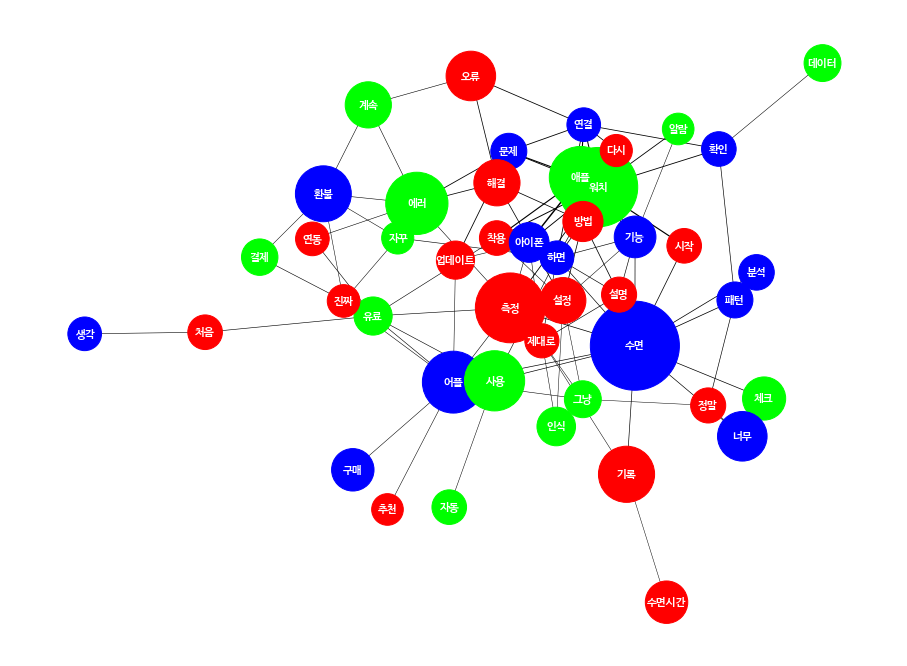

In [149]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# plt.rc('font', family='NanumGothic')
plt.figure(figsize=(16, 12))
plt.axis('off')

colors = ["#FF0000", "#00FF00", "#0000FF"]
ncolor = [colors[i] for i in np.random.default_rng(seed=1).integers(0, len(colors), len(nsize))]
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G,
                 pos=pos,
                 with_labels=True,
                 font_family="NanumBarunGothic",
                 width=np.array(weights) * 4,
                #  edge_color='lightblue',
                 font_size=11,
                 node_color=ncolor,
                 node_size=nsize,
                 font_weight='semibold',
                 edge_cmap='gray',
                 font_color='white')
                #  edgecolors='black',
                #  linewidths=0.1)
plt.savefig(f'{fname}.png')
plt.savefig(f'{fname}.svg')

In [85]:
!ls /usr/share/fonts/truetype/nanum/

NanumBarunGothicBold.ttf  NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumBarunGothic.ttf	  NanumMyeongjo.ttf	 NanumSquareR.ttf
NanumGothicBold.ttf	  NanumSquareB.ttf
NanumGothic.ttf		  NanumSquareRoundB.ttf
